# Model: Logistic Regression with all the columns

In this notebook, all the training/predictions steps are implemented for a very basic model (logistic regression with all the features). 
The goal is to get the best f1-score ! May the force be with you 🧨🧨  

# Import libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, recall_score,precision_score, RocCurveDisplay
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt

from IPython.display import display

# Read file with labels

In [2]:
data = pd.read_csv('../data/processed/conversion_data_train_EDA_without_outliers_output.csv')
print('Set with labels (our train+test) :', data.shape)

Set with labels (our train+test) : (284578, 6)


In [3]:
data.head()

,country,age,new_user,source,total_pages_visited,converted
0,China,22,1,Direct,2,0
1,UK,21,1,Ads,3,0
2,Germany,20,0,Seo,14,1
3,US,23,1,Seo,3,0
4,US,28,1,Direct,3,0


# Make your model

## Choose variables to use in the model, and create train and test sets
**From the EDA, we know that the most useful feature is total_pages_visited. Let's create a baseline model by using at first only this feature : in the next cells, we'll make preprocessings and train a simple (univariate) logistic regression.**

In [4]:
target_variable = 'converted'
X = data.drop(columns=[target_variable])
Y = data.loc[:, target_variable]
print('Explanatory variables : ', X.columns)
print()

Explanatory variables :  Index(['country', 'age', 'new_user', 'source', 'total_pages_visited'], dtype='object')



In [5]:
# Divide dataset Train set & Test set 
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=925662591, stratify=Y)
print("...Done.")
print()

Dividing into train and test sets...


...Done.



## Training pipeline

In [6]:
# Put here all the preprocessings
print("Encoding categorical features and standardizing numerical features...")

# Create pipeline for numeric features
display(X.select_dtypes(exclude='object') )
numeric_features = X.select_dtypes(exclude='object').columns  # Names of numeric columns in X_train/X_test
numeric_transformer = Pipeline(
    steps=[
        (
            "scaler", 
            StandardScaler()
        ),
    ]
)

display(X.select_dtypes(include='object') )

# Create pipeline for categorical features
categorical_features = X.select_dtypes(include='object').columns  # Names of categorical columns in X_train/X_test
categorical_transformer = Pipeline(
    steps=[
        (
            "encoder",
            OneHotEncoder(drop="first"),
        ),  # first column will be dropped to avoid creating correlations between features
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

# Preprocessings on train set
print("Performing preprocessings on train set...")
print(X_train.head())
preprocessor.fit(X_train)
X_train = preprocessor.transform(X_train)
print("...Done.")
print(
    X_train[0:5]
)  # MUST use this syntax because X_train is a numpy array and not a pandas DataFrame anymore
print()

Encoding categorical features and standardizing numerical features...


,age,new_user,total_pages_visited
0,22,1,2
1,21,1,3
2,20,0,14
3,23,1,3
4,28,1,3
...,...,...,...
284573,36,1,1
284574,31,1,2
284575,41,1,5
284576,31,1,4


,country,source
0,China,Direct
1,UK,Ads
2,Germany,Seo
3,US,Seo
4,US,Direct
...,...,...
284573,US,Ads
284574,US,Seo
284575,US,Seo
284576,US,Direct


Performing preprocessings on train set...
        country  age  new_user  source  total_pages_visited
35058        US   49         1     Seo                    7
169755  Germany   26         0  Direct                    4
173120    China   39         0  Direct                    9
249159       US   39         0     Seo                    4
40032     China   33         1     Seo                    2
...Done.
[[ 2.23314291  0.67684511  0.63533212  0.          0.          1.
   0.          1.        ]
 [-0.55155947 -1.47744289 -0.26180716  1.          0.          0.
   1.          0.        ]
 [ 1.02240274 -1.47744289  1.23342498  0.          0.          0.
   1.          0.        ]
 [ 1.02240274 -1.47744289 -0.26180716  0.          0.          1.
   0.          1.        ]
 [ 0.29595865  0.67684511 -0.85990002  0.          0.          0.
   0.          1.        ]]



In [7]:
# Train model
print("Train model...")
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)
print("...Done.")

Train model...


...Done.


In [8]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = classifier.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

Predictions on training set...
...Done.
[0 0 0 ... 0 0 0]



## Test pipeline

In [9]:
# Use X_test, and the same preprocessings as in training pipeline, 
# but call "transform()" instead of "fit_transform" methods (see example below)

print("Encoding categorical features and standardizing numerical features...")

# Preprocessings on test set
print("Performing preprocessings on test set...")
print(X_test.head())
X_test = preprocessor.transform(
    X_test
)  # Don't fit again !! The test set is used for validating decisions
# we made based on the training set, therefore we can only apply transformations that were parametered using the training set.
# Otherwise this creates what is called a leak from the test set which will introduce a bias in all your results.
print("...Done.")
print(
    X_test[0:5, :]
)  # MUST use this syntax because X_test is a numpy array and not a pandas DataFrame anymore
print()

Encoding categorical features and standardizing numerical features...
Performing preprocessings on test set...
       country  age  new_user  source  total_pages_visited
35367    China   30         1  Direct                    8
236725      US   41         1     Seo                    1
41000       UK   29         0     Seo                    2
41435       US   45         1     Seo                    2
18633    China   33         1     Seo                    8
...Done.
[[-0.0672634   0.67684511  0.93437855  0.          0.          0.
   1.          0.        ]
 [ 1.26455078  0.67684511 -1.15894645  0.          0.          1.
   0.          1.        ]
 [-0.18833742 -1.47744289 -0.85990002  0.          1.          0.
   0.          1.        ]
 [ 1.74884684  0.67684511 -0.85990002  0.          0.          1.
   0.          1.        ]
 [ 0.29595865  0.67684511  0.93437855  0.          0.          0.
   0.          1.        ]]



In [10]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = classifier.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

Predictions on test set...
...Done.
[0 0 0 ... 0 0 1]



## Performance assessment

In [11]:
import plotly.express as px

column_names = [col.split('__')[1] for col in preprocessor.get_feature_names_out()]
print("Names of columns corresponding to each coefficient: ", column_names)
coefs = pd.DataFrame(index = column_names, data = classifier.coef_[0].transpose(), columns=["coefficients"])
coefs
feature_importance = abs(coefs).sort_values(by = 'coefficients')
feature_importance
fig = px.bar(feature_importance, orientation = 'h')
fig.update_layout(showlegend = False, 
                  margin = {'l': 120} # to avoid cropping of column names
                 )
fig.show()

Names of columns corresponding to each coefficient:  ['age', 'new_user', 'total_pages_visited', 'country_Germany', 'country_UK', 'country_US', 'source_Direct', 'source_Seo']


In [12]:
print("f1-score:")
print()
print("* f1-score on training set: ", f1_score(Y_train, Y_train_pred))
print("* f1-score on test set: ", f1_score(Y_test,Y_test_pred))
print()

print("accuracy:")
print()
print("* accuracy on training set : ", accuracy_score(Y_train, Y_train_pred))
print("* accuracy on test set : ", accuracy_score(Y_test, Y_test_pred))
print()

print("recall:")
print()
print("* recall-score on training set: ", recall_score(Y_train, Y_train_pred))
print("* recall-score on training set: ", recall_score(Y_test, Y_test_pred))
print()

print("precision:")
print()
print("* precision-score on training set: ", precision_score(Y_train, Y_train_pred))
print("* precision-score on test set: ", precision_score(Y_test, Y_test_pred))

f1-score:

* f1-score on training set:  0.764031382015691
* f1-score on test set:  0.7585788035226237

accuracy:

* accuracy on training set :  0.9862603333011218
* accuracy on test set :  0.9860320472274932

recall:

* recall-score on training set:  0.6897303187142468
* recall-score on training set:  0.6802832244008714

precision:

* precision-score on training set:  0.8562732499154548
* precision-score on test set:  0.8572409059711736


In [13]:
# You can also check more performance metrics to better understand what your model is doing
print("Confusion matrix on train set : ")
print(confusion_matrix(Y_train, Y_train_pred))
print()
print("Confusion matrix on test set : ")
print(confusion_matrix(Y_test, Y_test_pred))
print()

Confusion matrix on train set : 
[[219470    850]
 [  2278   5064]]

Confusion matrix on test set : 
[[54872   208]
 [  587  1249]]



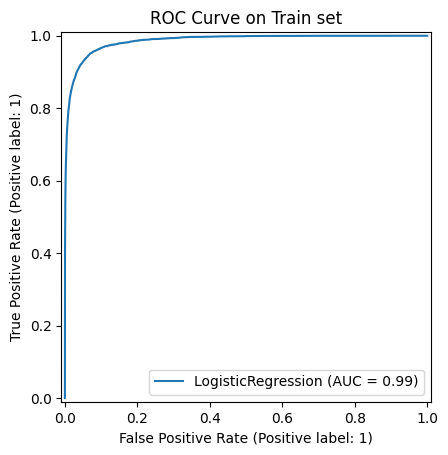

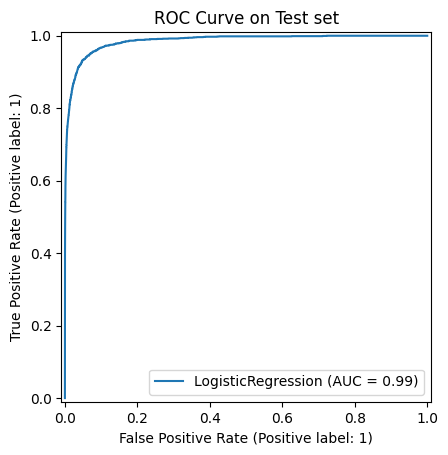

In [14]:
_, ax = plt.subplots()
ax.set(
    title="ROC Curve on Train set"
)  # Set a title that we will add into ConfusionMatrixDisplay
RocCurveDisplay.from_estimator(
    classifier, X_train, Y_train, ax=ax
)  # RocCurveDisplay from sklearn
plt.show()

_, ax = plt.subplots()  # Get subplot from matplotlib
ax.set(
    title="ROC Curve on Test set"
)  # Set a title that we will add into ConfusionMatrixDisplay
RocCurveDisplay.from_estimator(
    classifier, X_test, Y_test, ax=ax
)  # RocCurveDisplay from sklearn
plt.show()

**We improved our f1-score at 76% on the test and train sets. 🚀🚀**

# Train best classifier on all data and use it to make predictions on X_without_labels
**Before making predictions on the file conversion_data_test.csv, let's train our model on ALL the data that was in conversion_data_train.csv. Sometimes, this allows to make tiny improvements in the score because we're using more examples to train the model.**

In [15]:
# Concatenate our train and test set to train your best classifier on all data with labels
X = np.append(X_train,X_test, axis=0)
Y = np.append(Y_train,Y_test)

classifier.fit(X,Y)

LogisticRegression()

In [16]:
# Read data without labels
data_without_labels = pd.read_csv('../data/raw/conversion_data_test.csv')
print('Prediction set (without labels) :', data_without_labels.shape)

Prediction set (without labels) : (31620, 5)


In [17]:
# WARNING : PUT HERE THE SAME PREPROCESSING AS FOR YOUR TEST SET
# CHECK YOU ARE USING X_without_labels
print("Encoding categorical features and standardizing numerical features...")

X_without_labels = preprocessor.transform(data_without_labels)
print("...Done")
print(X_without_labels[0:5,:])

Encoding categorical features and standardizing numerical features...
...Done
[[-0.30941143 -1.47744289  3.32674998  0.          1.          0.
   0.          1.        ]
 [-1.03585553  0.67684511  0.03723927  0.          1.          0.
   1.          0.        ]
 [ 0.17488463  0.67684511 -1.15894645  0.          0.          0.
   0.          1.        ]
 [ 0.17488463  0.67684511  0.3362857   0.          0.          1.
   0.          0.        ]
 [-0.67263348 -1.47744289 -0.56085359  0.          0.          0.
   0.          1.        ]]


In [ ]:
# Make predictions and dump to file
# WARNING : MAKE SURE THE FILE IS A CSV WITH ONE COLUMN NAMED 'converted' AND NO INDEX !
# WARNING : FILE NAME MUST HAVE FORMAT 'conversion_data_test_predictions_[name].csv'
# where [name] is the name of your team/model separated by a '-'
# For example : [name] = AURELIE-model1
data = {
    'converted': classifier.predict(X_without_labels)
}

Y_predictions = pd.DataFrame(columns=['converted'],data=data)
Y_predictions.to_csv('../data/processed/conversion_data_test_predictions_Nicolas-LogReg.csv', index=False)
